
---

### 🏡 **House Price Prediction Problem**

#### 📌 **Objective**

The goal of this project is to **predict the sale price of residential houses** based on their features such as size, location, number of rooms, condition, and nearby amenities. This is a **supervised machine learning regression task**, as the target variable (`Price`) is continuous.

#### 📊 **Dataset**

* **Source**: [Kaggle – House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) *(or a custom dataset if you used your own)*
* **Features**: Includes both **numerical and categorical** variables (e.g., land area, furnishing status, kitchen type, view, etc.)
* **Target**: `Price` (in INR)
* **Additional Target (for classification)**: `Price_Category` – categorized as **Low**, **Medium**, or **High** using quantile binning

#### 🧠 **Machine Learning Approach**

* **Linear Regression**: Predicts the actual market price of the house
* **Logistic Regression**: Classifies the house into price ranges (Low/Medium/High)
* **Streamlit App**: User interface to input data, get predictions, and receive location mapping + improvement suggestions

---

### 🌍 **Real-World Impact**

* Helps **buyers/sellers** evaluate fair property value
* Enables **real estate agents** to price homes competitively
* Useful for **banks and financial institutions** for mortgage valuation and risk analysis
* Can support **urban planning and housing policy decisions**

---

### ⚠️ **Key Challenges**

1. **Heterogeneous Features** – Mix of numeric and categorical inputs
2. **Missing Values** – Common in real-world housing data
3. **Skewed Target Variable** – House prices are not normally distributed
4. **Feature Correlation** – Some variables may be highly correlated and require handling

---

### ✅ **Key Takeaways**

* A **regression problem** focused on predicting continuous price values
* Strong emphasis on **data cleaning, encoding, and scaling**
* **Domain knowledge** in real estate boosts model performance
* Combining ML with an intuitive UI makes the solution accessible and practical

---

#Approach

### **1. Data Collection**
- **Sources**: CSV files, APIs, databases, web scraping.  
- **Validation**: Ensure data is **relevant**, **sufficient**, and **unbiased**.  


In [2]:
#loading the dataset
import pandas as pd
train=pd.read_excel('/content/Book1.xlsx')

In [3]:
display(train.head())

,No,Property_Type,Land_Area,Floor_Area,Condition,View,Amenities,Furnishing_Status,Air_Conditioning (Yes/No),Heating (Yes/No),...,Location,Num_bathrooms,Num_rooms,Price,distance to nearest MRT Station,distance to nearest Hospital,distance to nearest School,distance to nearest Bus Stand,distance to nearest Airport,Crimerate in area
0,1,Condo,1784,1555,New,NaN,Basic,Fully Furnished,No,Yes,...,Phoenix,3,2,334126,7.06,11.83,3.54,2.67,45.83,9.9
1,2,Farmhouse,1768,1530,New,City View,Basic,Semi Furnished,No,Yes,...,San Francisco,2,3,1895788,3.96,14.28,1.02,1.21,21.99,7.7
2,3,Apartment,2667,2667,Old,Park Facing,Rooftop Access,Fully Furnished,Yes,No,...,Miami,2,3,4397494,14.08,0.92,4.94,0.62,11.06,5.3
3,4,Apartment,1262,1262,Old,City View,NaN,Semi Furnished,Yes,No,...,Chicago,3,4,1367842,14.17,14.21,7.13,0.39,43.88,8.9
4,5,Apartment,1720,1720,Renovated,City View,Parking,Semi Furnished,Yes,No,...,New York,4,6,1403758,6.09,8.50,7.16,4.56,40.70,8.2


In [4]:
#checking shapes
print("Train shape:", train.shape)



Train shape: (1000, 25)


In [5]:
#checking columns
print("Train columns:", train.columns.tolist())


Train columns: ['No', 'Property_Type', 'Land_Area', 'Floor_Area', 'Condition', 'View', 'Amenities', 'Furnishing_Status', 'Air_Conditioning (Yes/No)', 'Heating (Yes/No)', 'Kitchen_Type', 'Balcony (Yes/No)', 'Maintenance_Fees', 'Latitude', 'Longitude', 'Location', 'Num_bathrooms', 'Num_rooms', 'Price', 'distance to nearest MRT Station', 'distance to nearest Hospital', 'distance to nearest School', 'distance to nearest Bus Stand', 'distance to nearest Airport', 'Crimerate in area']


In [6]:
#checking missing values
print("Missing values in train:", train.isnull().sum())

#checking total missing values
print("Total Missing values in train:", train.isnull().sum().sum())



Missing values in train: No                                   0
Property_Type                        0
Land_Area                            0
Floor_Area                           0
Condition                            0
View                               296
Amenities                          172
Furnishing_Status                   76
Air_Conditioning (Yes/No)            0
Heating (Yes/No)                     0
Kitchen_Type                        76
Balcony (Yes/No)                     0
Maintenance_Fees                     0
Latitude                             0
Longitude                            0
Location                             0
Num_bathrooms                        0
Num_rooms                            0
Price                                0
distance to nearest MRT Station      0
distance to nearest Hospital         0
distance to nearest School           0
distance to nearest Bus Stand        0
distance to nearest Airport          0
Crimerate in area                    0


In [7]:
#checking duplicate value
print("Duplicate rows in train:", train.duplicated().sum())


Duplicate rows in train: 0


### **2. Exploratory Data Analysis (EDA)**
- **Overview**: Check shape, info(), describe().  
- **Missing Values**: Visualize nulls and decide: drop or impute.  
- **Visualizations**:  
  - Histograms/KDE for target distribution.  
  - Boxplots for outliers.  
  - Scatterplots for feature-target relationships.  
  - Heatmap for correlations.  

In [8]:
# Basic stats for train
print("Train Data")
print(train.info())
print(train.describe())



Train Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   No                               1000 non-null   int64  
 1   Property_Type                    1000 non-null   object 
 2   Land_Area                        1000 non-null   int64  
 3   Floor_Area                       1000 non-null   int64  
 4   Condition                        1000 non-null   object 
 5   View                             704 non-null    object 
 6   Amenities                        828 non-null    object 
 7   Furnishing_Status                924 non-null    object 
 8   Air_Conditioning (Yes/No)        1000 non-null   object 
 9   Heating (Yes/No)                 1000 non-null   object 
 10  Kitchen_Type                     924 non-null    object 
 11  Balcony (Yes/No)                 1000 non-null   object 
 12  Maintenanc

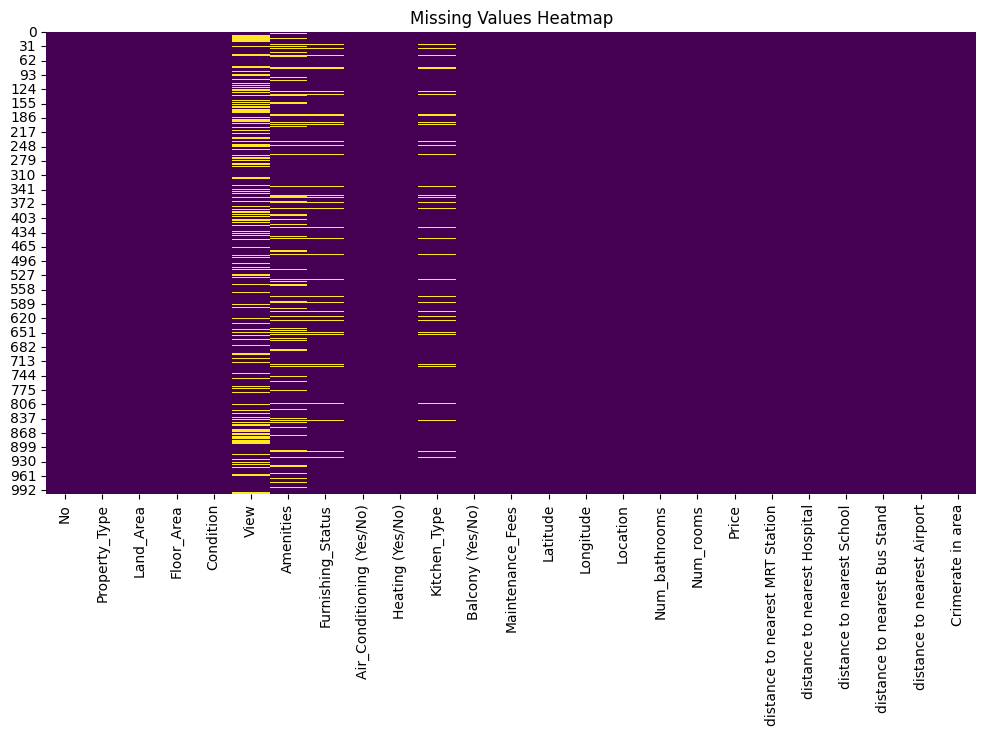

In [9]:
#2. Missing Values Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

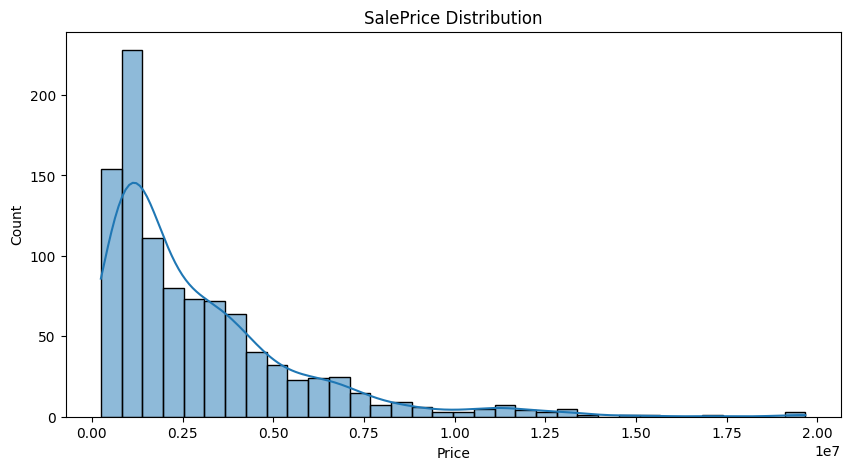

In [10]:
# Distribution of SalePrice
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(train['Price'], kde=True)
plt.title("SalePrice Distribution")
plt.show()

In [11]:
# Skewness and kurtosis
print("Skewness:", train['Price'].skew())  # >1 = right-skewed
print("Kurtosis:", train['Price'].kurt())   # >3 = heavy-tailed

Skewness: 2.141631502857635
Kurtosis: 6.342665392844028


In [12]:
# Correlation with target
import matplotlib.pyplot as plt
import seaborn as sns
corr = train.corr(numeric_only=True)['Price'].sort_values(ascending=False)
corr



,Price
Price,1.000000
Floor_Area,0.425500
Maintenance_Fees,0.418981
Land_Area,0.405683
Num_bathrooms,0.334570
Num_rooms,0.322431
distance to nearest School,0.026936
Latitude,0.000325
distance to nearest Airport,-0.006430
distance to nearest Bus Stand,-0.011652


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

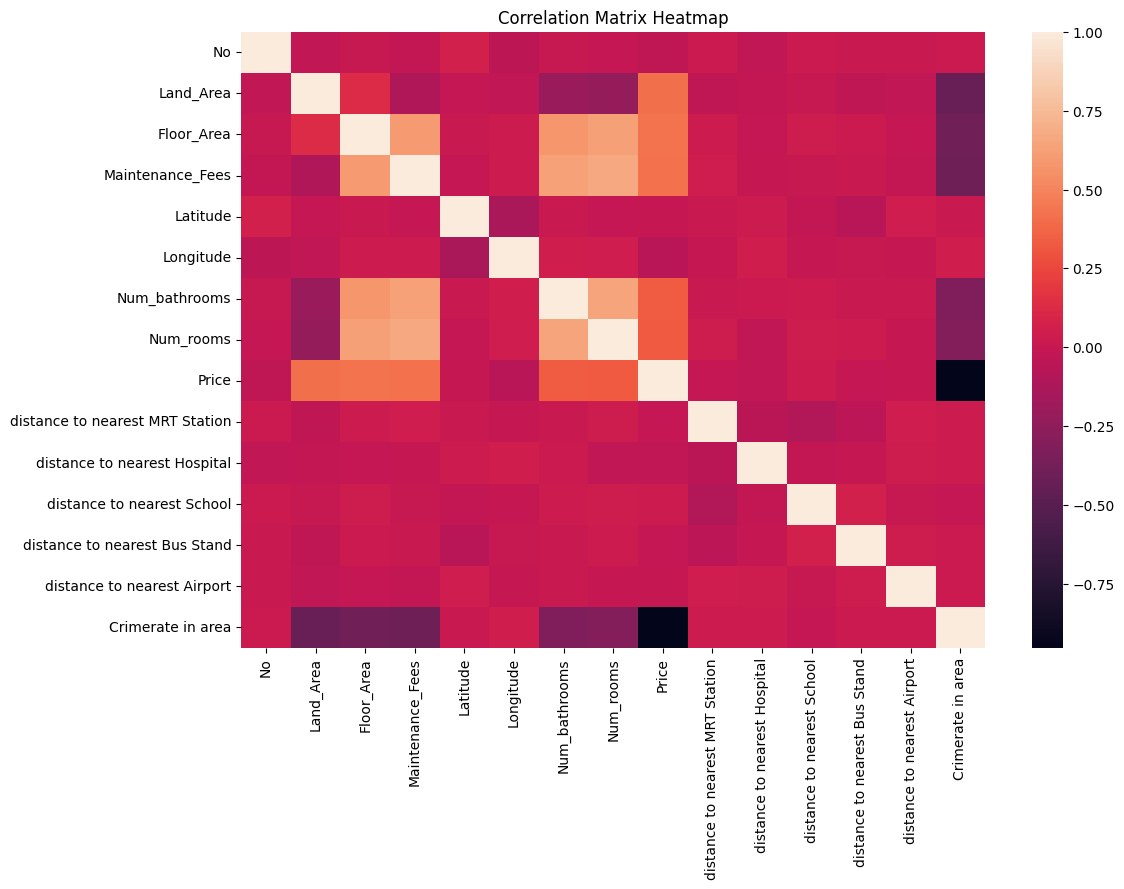

In [13]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(numeric_only=True))
plt.title("Correlation Matrix Heatmap")

In [14]:
# Selecting key features for pairplot
key_features = [
    'Price',
    'Floor_Area',
    'Land_Area',
    'Num_rooms',
    'Num_bathrooms',
    'Maintenance_Fees',
    'distance to nearest MRT Station',
    'Crimerate in area'
]

In [15]:

# # Create the pair plot
# sns.pairplot(train)
# plt.suptitle("Pair Plot of Important Features", y=1.02)
# plt.show()
#take a lot of time

Text(0, 0.5, 'Frequency')

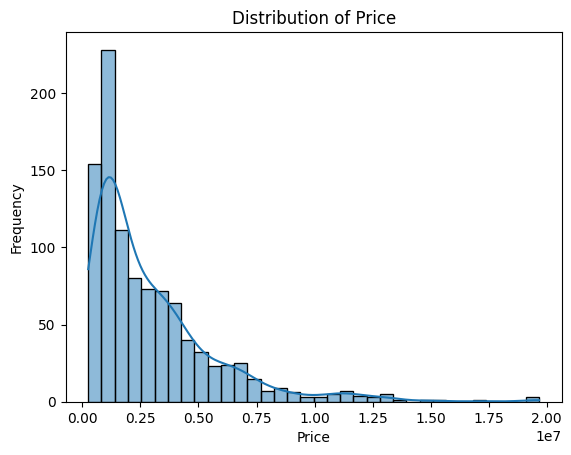

In [16]:

sns.histplot(train['Price'], kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")


Text(0.5, 1.0, 'Boxplot of Price')

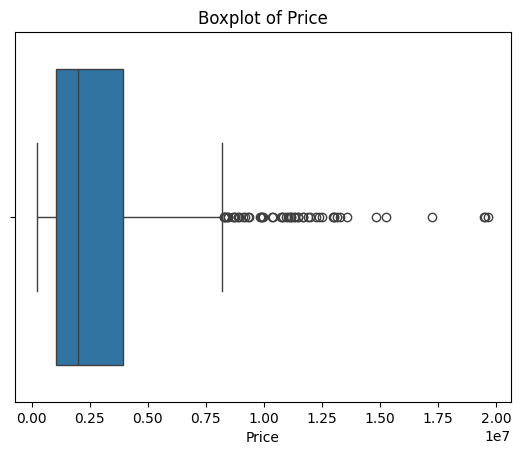

In [17]:
#Boxplots for Outliers
sns.boxplot(x=train['Price'])
plt.title("Boxplot of Price")



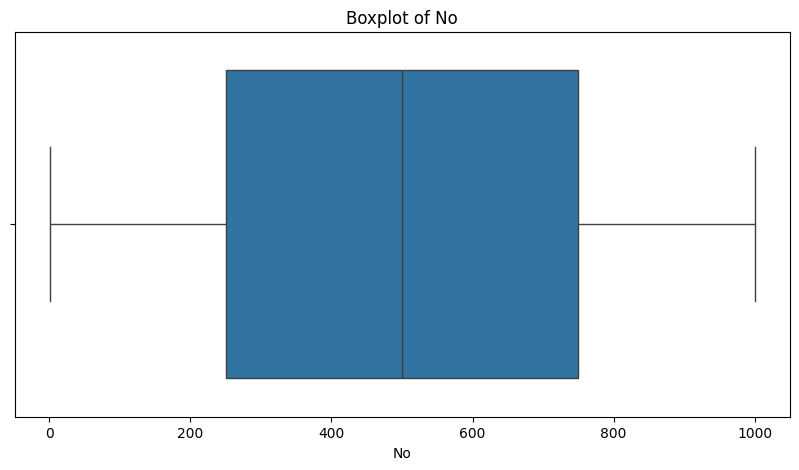

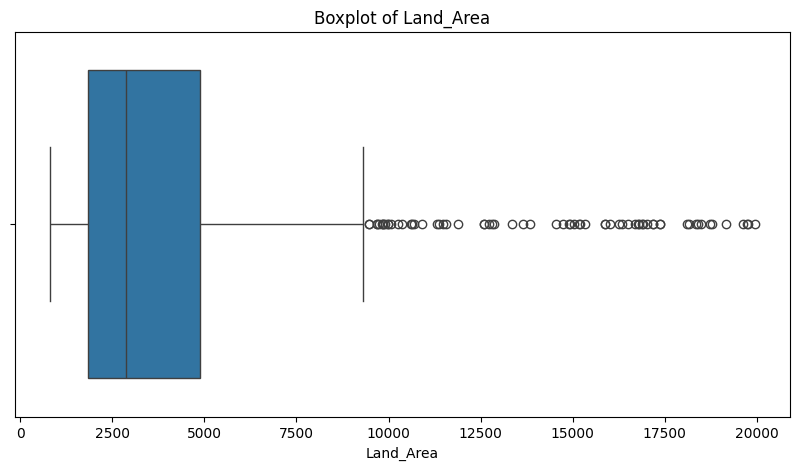

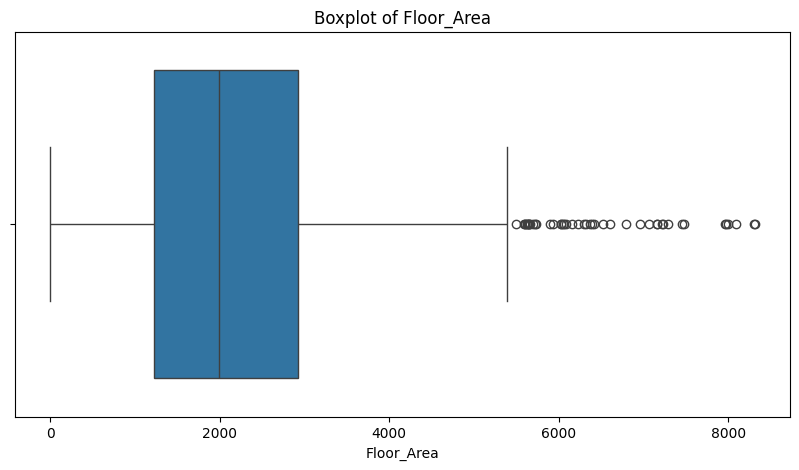

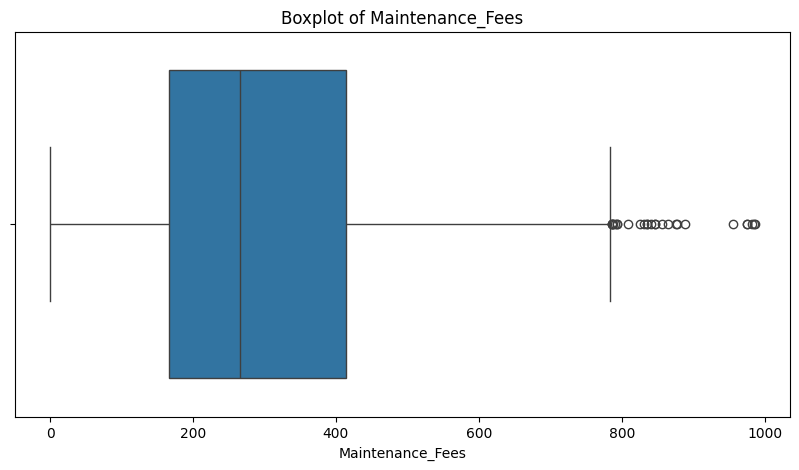

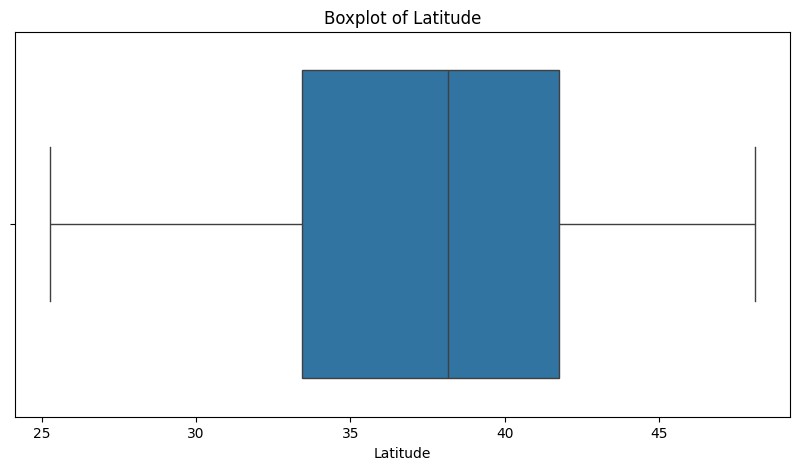

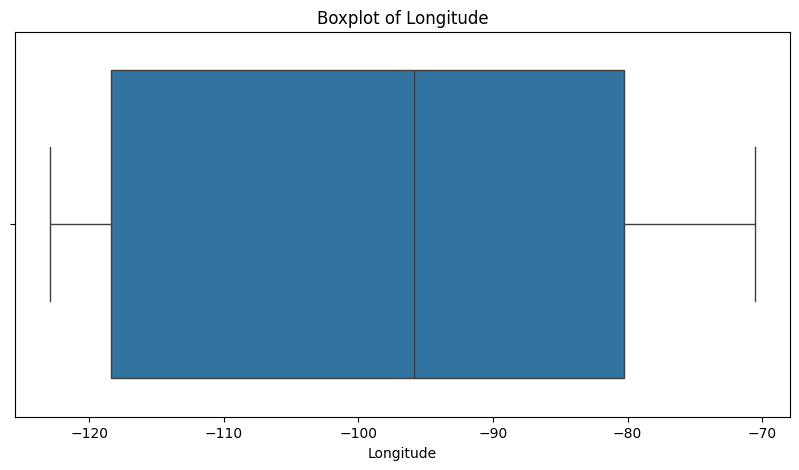

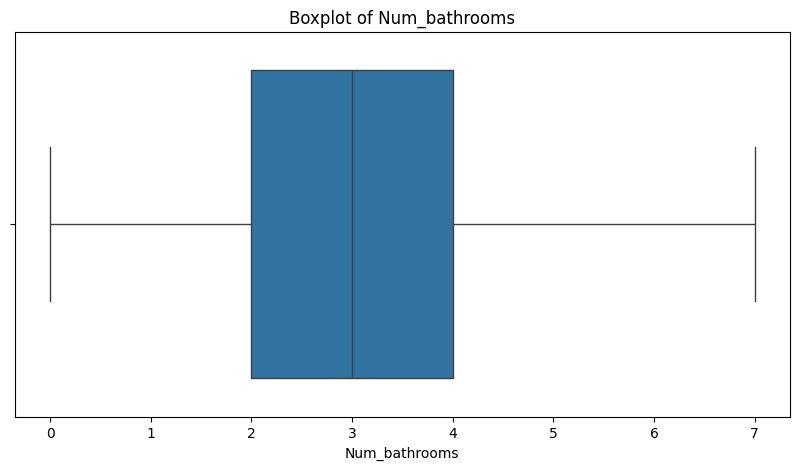

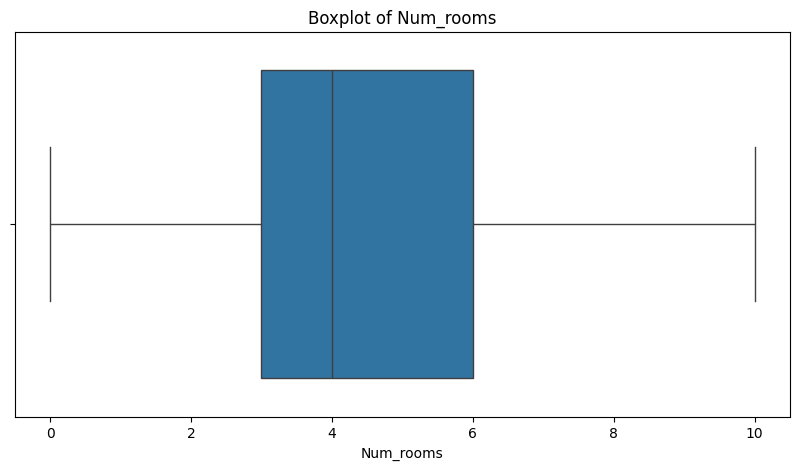

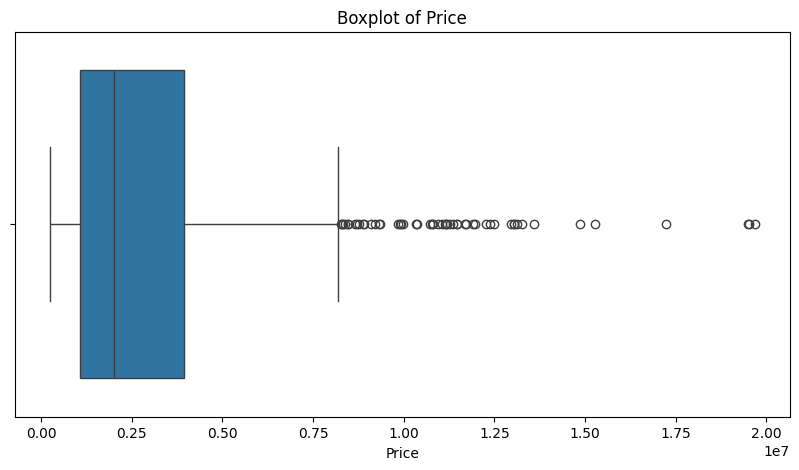

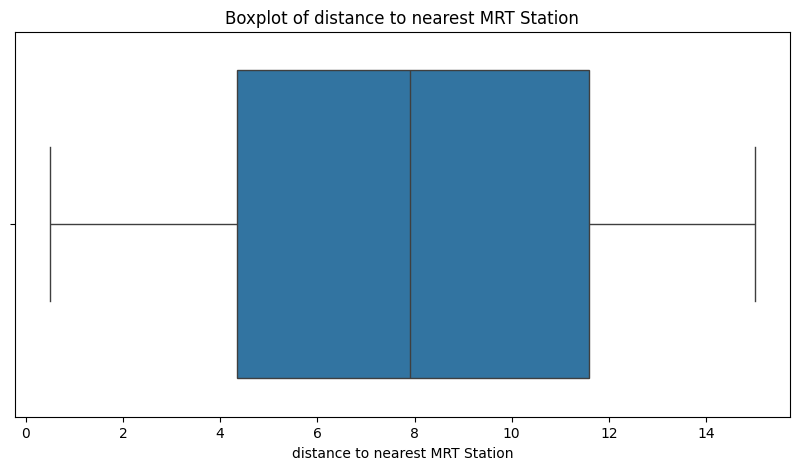

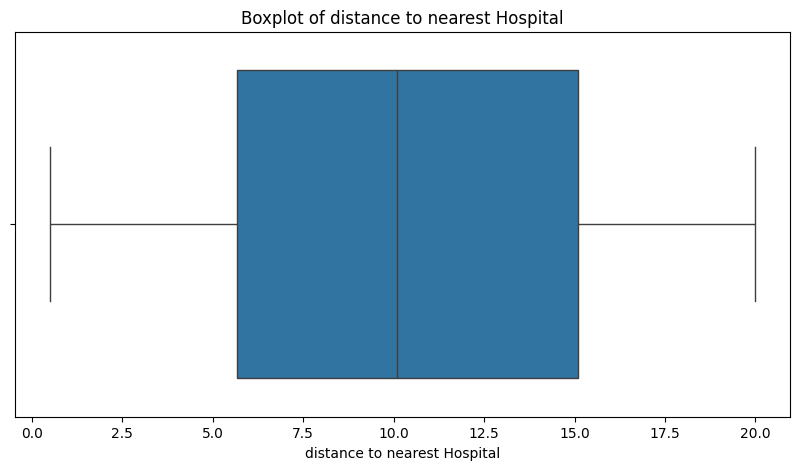

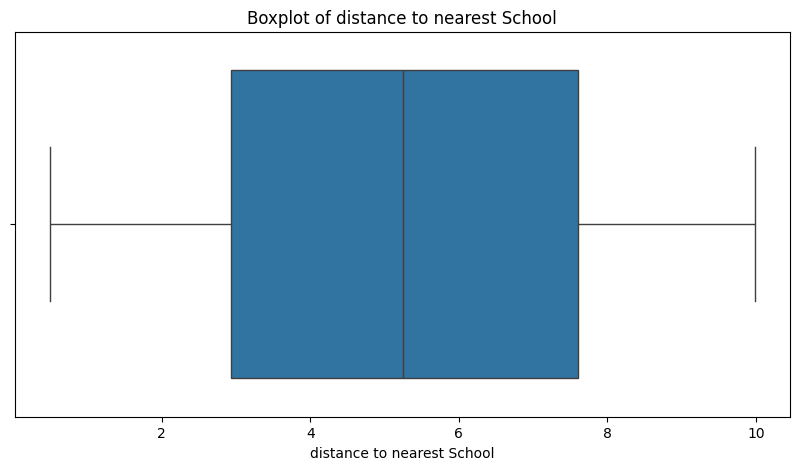

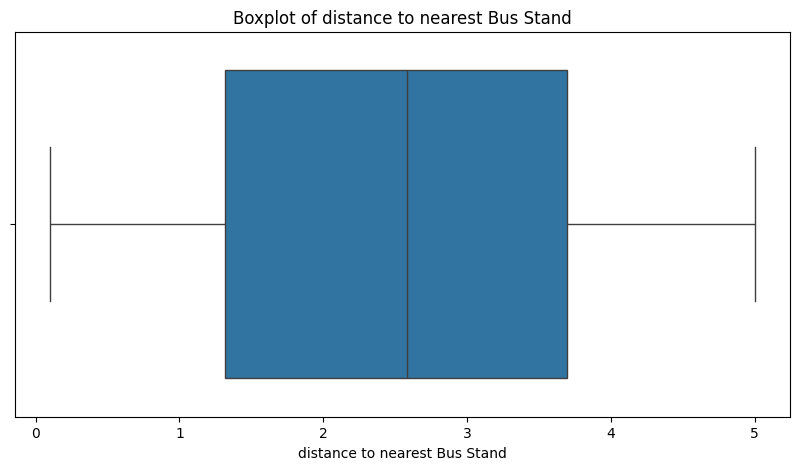

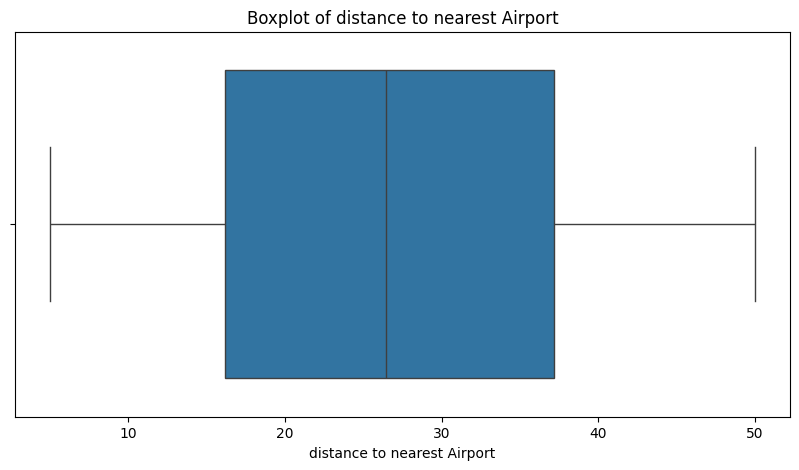

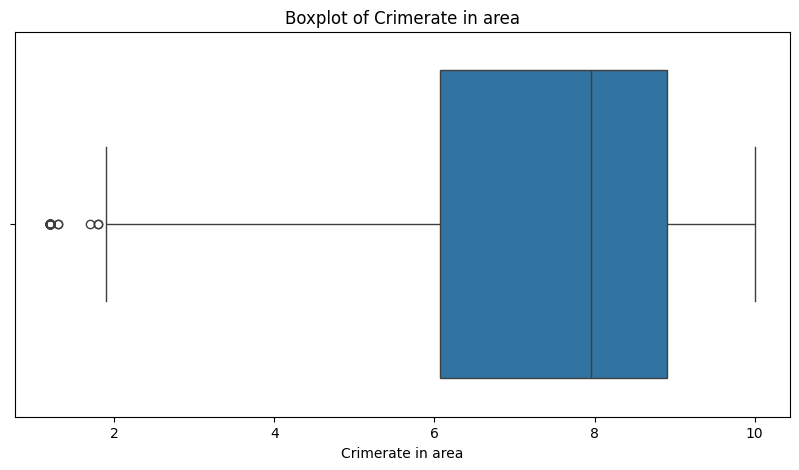

In [18]:
# Boxplot for numeric features
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplot for each numeric feature
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

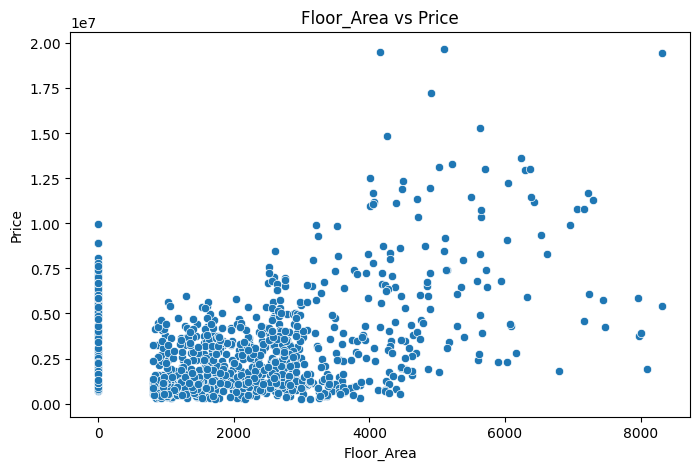

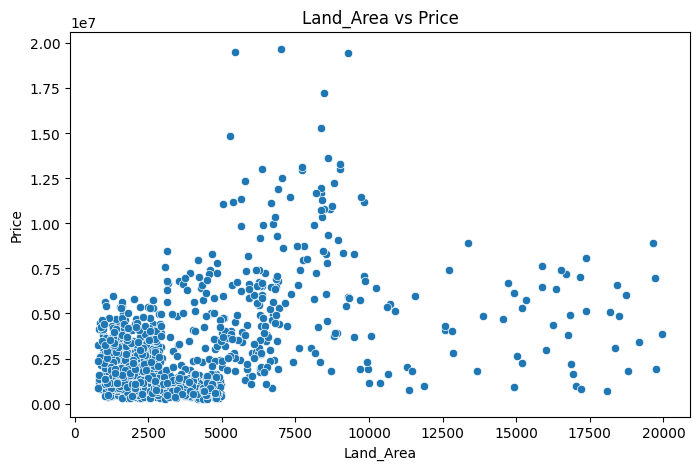

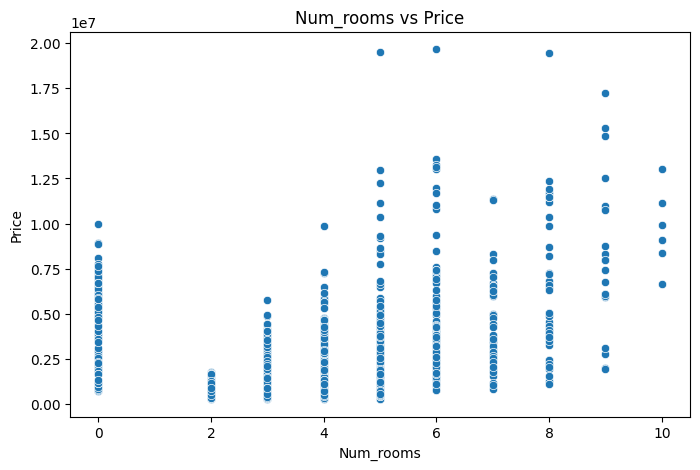

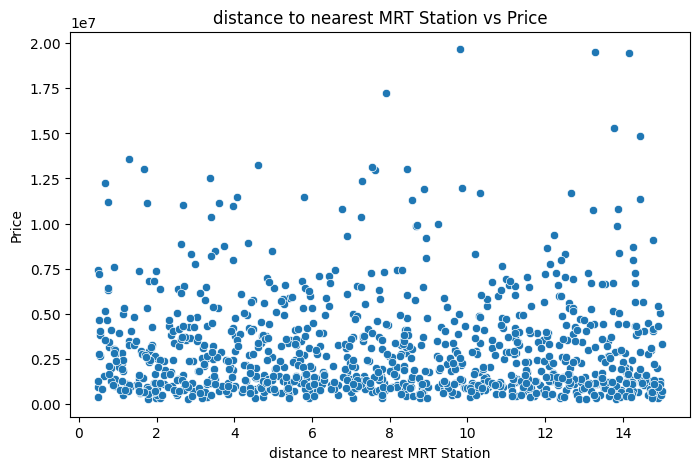

In [19]:
important_features = ['Floor_Area', 'Land_Area', 'Num_rooms', 'distance to nearest MRT Station']

for feature in important_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=train[feature], y=train['Price'])
    plt.title(f"{feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

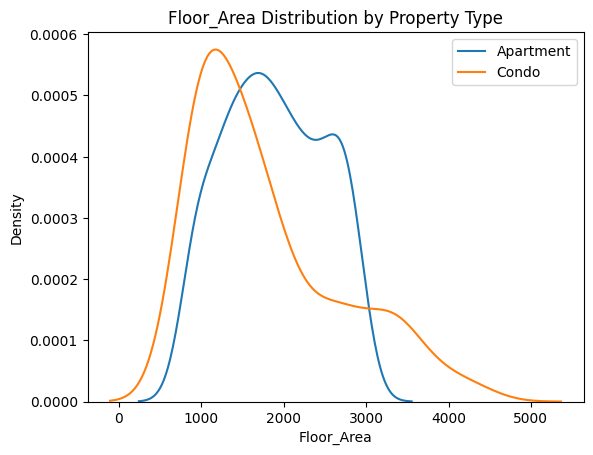

In [20]:
# Pick top 2 most frequent property types for comparison
top_types = train['Property_Type'].value_counts().index[:2]

# KDE plots for top property types
for property_type in top_types:
    sns.kdeplot(train[train['Property_Type'] == property_type]['Floor_Area'], label=property_type)

plt.title("Floor_Area Distribution by Property Type")
plt.xlabel("Floor_Area")
plt.ylabel("Density")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Property Type Distribution')

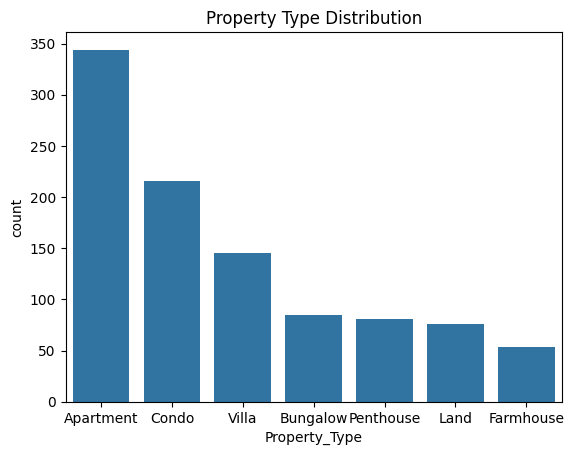

In [21]:
#count plot
sns.countplot(x='Property_Type', data=train, order=train['Property_Type'].value_counts().index)
plt.title("Property Type Distribution")



### **3. Data Preprocessing**
- **Missing Data**:  
  - Drop columns/rows with excessive nulls.  
  - Impute: **Median** (numeric), **Mode** (categorical).  
- **Categorical Encoding**:  
  - **One-Hot** (nominal), **Label** (ordinal).  
- **Feature Scaling**:  
  - **StandardScaler** (SVM, KNN), **MinMaxScaler** (neural nets).  
- **Feature Engineering**:  
  - Create new features.  
  - Transform skewed data (log/power transforms).  
- **Train-Test Split**:  
  ```python
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  ```

In [22]:
# Import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [23]:
#Drop columns with excessive nulls
null_thresh = 0.5
train = train.loc[:, train.isnull().mean() < null_thresh]


In [24]:
#Impute missing values
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train.select_dtypes(include=['object']).columns


In [25]:
# Impute numeric columns with median
num_imputer = SimpleImputer(strategy='median')
train[numeric_cols] = num_imputer.fit_transform(train[numeric_cols])


In [26]:
# Impute categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
train[categorical_cols] = cat_imputer.fit_transform(train[categorical_cols])


In [27]:
#Label Encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le


In [28]:
#Feature Engineering(Create a new feature: Price per square foot)

if 'Price' in train.columns and 'Floor_Area' in train.columns:
    train['Price_per_sqft'] = train['Price'] / (train['Floor_Area'] + 1)  # Avoid division by zero

In [29]:
#Feature Scaling
scaler = StandardScaler()
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])

In [30]:
#Step 7: Train-Test Split
X = train.drop('Price', axis=1)
y = train['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **4. Model Selection and Model Training **
- **Baseline Models**:  
  - **Regression**: Linear Regression, Random Forest.  
  - **Classification**: Logistic Regression, SVM, Random Forest.  
- **Advanced Models**:  
  - Gradient Boosted Trees (XGBoost, LightGBM).  
  - Neural Networks (for complex patterns).  

- **Fit Model**:  Using
  ```python
  model.fit(X_train, y_train)
  ```

linear regression model

In [31]:
#importing libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [33]:
print("RMSE value:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


RMSE value: 0.049599693152525416
R² Score: 0.9469635977833397


random forest

In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)

# print("RMSE value:", mean_squared_error(y_test, y_pred_rf))
# print("R² Score:", r2_score(y_test, y_pred_rf))

logistic_regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert Price to binary (1 if above median, else 0)
y_class = (train['Price'] > train['Price'].median()).astype(int)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_cls, y_train_cls)

y_pred_logreg = logistic_model.predict(X_test_cls)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **5. Model Evaluation**
  - **Accuracy**, **Precision**, **Recall** , F1 score , confuse matrix and classification report

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test_cls, y_pred_logreg))
print("Precision:", precision_score(y_test_cls, y_pred_logreg))
print("Recall:", recall_score(y_test_cls, y_pred_logreg))
print("F1 Score:", f1_score(y_test_cls, y_pred_logreg))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_logreg))

# Full Classification Report
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_logreg))


Accuracy: 0.92
Precision: 0.9090909090909091
Recall: 0.9090909090909091
F1 Score: 0.9090909090909091

Confusion Matrix:
 [[104   8]
 [  8  80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       112
           1       0.91      0.91      0.91        88

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



### **7. Deployment**
- **Save Model**:  
  ```python
  import pickle
  ```
- **Deploy**:  
  - using flask

In [37]:
#saving the models
import pickle

# Save Linear Regression model
with open('linear_model_pickle.pkl', 'wb') as f:
    pickle.dump(lr, f)

# # Save Random Forest model
# with open('random_forest_model_pickle.pkl', 'wb') as f:
#     pickle.dump(rf, f)

# Save Logistic Regression model
with open('logistic_model_pickle.pkl', 'wb') as f:
    pickle.dump(logistic_model, f)


In [38]:
#opening the models
with open('linear_model_pickle.pkl', 'rb') as f:
    linear_model = pickle.load(f)

# with open('random_forest_model_pickle.pkl', 'rb') as f:
#     rf_model = pickle.load(f)

with open('logistic_model_pickle.pkl', 'rb') as f:
    logistic_model = pickle.load(f)


#website using streamlit


In [39]:
#streamlit run [file path]

In [ ]:
#loading the dataset
import pandas as pd
train=pd.read_excel('/content/Book1.xlsx')

# =============================
display(train.head())
# =============================
#checking shapes
print("Train shape:", train.shape)
# =============================
#checking columns
print("Train columns:", train.columns.tolist())
# =============================
#checking missing values
print("Missing values in train:", train.isnull().sum())
#checking total missing values
print("Total Missing values in train:", train.isnull().sum().sum())
# =============================
#checking duplicate value
print("Duplicate rows in train:", train.duplicated().sum())
# =============================
# Basic stats for train
print("Train Data")
print(train.info())
print(train.describe())
# ============================
#2. Missing Values Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()
# =============================
# Distribution of SalePrice
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(train['Price'], kde=True)
plt.title("SalePrice Distribution")
plt.show()
# =============================
# Skewness and kurtosis
print("Skewness:", train['Price'].skew())  # >1 = right-skewed
print("Kurtosis:", train['Price'].kurt())   # >3 = heavy-tailed
# =============================
# Correlation with target
import matplotlib.pyplot as plt
import seaborn as sns
corr = train.corr(numeric_only=True)['Price'].sort_values(ascending=False)
corr
# =============================
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(numeric_only=True))
plt.title("Correlation Matrix Heatmap")
# =============================
# Selecting key features for pairplot
key_features = [
    'Price',
    'Floor_Area',
    'Land_Area',
    'Num_rooms',
    'Num_bathrooms',
    'Maintenance_Fees',
    'distance to nearest MRT Station',
    'Crimerate in area'
]
# =============================
# # Create the pair plot
# sns.pairplot(train)
# plt.suptitle("Pair Plot of Important Features", y=1.02)
# plt.show()
#take a lot of time
# =============================
sns.histplot(train['Price'], kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
# =============================
#Boxplots for Outliers
sns.boxplot(x=train['Price'])
plt.title("Boxplot of Price")
# =============================
# Boxplot for numeric features
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns
# Plot boxplot for each numeric feature
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()
# =============================
important_features = ['Floor_Area', 'Land_Area', 'Num_rooms', 'distance to nearest MRT Station']
for feature in important_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=train[feature], y=train['Price'])
    plt.title(f"{feature} vs Price")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()
# =============================
# Pick top 2 most frequent property types for comparison
top_types = train['Property_Type'].value_counts().index[:2]
# KDE plots for top property types
for property_type in top_types:
    sns.kdeplot(train[train['Property_Type'] == property_type]['Floor_Area'], label=property_type)
plt.title("Floor_Area Distribution by Property Type")
plt.xlabel("Floor_Area")
plt.ylabel("Density")
plt.legend()
plt.show()
# =============================
#count plot
sns.countplot(x='Property_Type', data=train, order=train['Property_Type'].value_counts().index)
plt.title("Property Type Distribution")
# ===========================
# Import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# =============================
# =============================
#Drop columns with excessive nulls
null_thresh = 0.5
train = train.loc[:, train.isnull().mean() < null_thresh]
# =============================
#Impute missing values
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train.select_dtypes(include=['object']).columns
# =============================
# Impute numeric columns with median
num_imputer = SimpleImputer(strategy='median')
train[numeric_cols] = num_imputer.fit_transform(train[numeric_cols])
# =============================
# Impute categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
train[categorical_cols] = cat_imputer.fit_transform(train[categorical_cols])
# =============================
#Label Encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le
# =============================
#Feature Engineering(Create a new feature: Price per square foot)
if 'Price' in train.columns and 'Floor_Area' in train.columns:
    train['Price_per_sqft'] = train['Price'] / (train['Floor_Area'] + 1)  # Avoid division by zero
# =============================
#Feature Scaling
scaler = StandardScaler()
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
# =============================
#Step 7: Train-Test Split
X = train.drop('Price', axis=1)
y = train['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# =============================
#importing libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
# =============================
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# ============================
print("RMSE value:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))
# =============================
# =============================
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)
# print("RMSE value:", mean_squared_error(y_test, y_pred_rf))
# print("R² Score:", r2_score(y_test, y_pred_rf))
# =============================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
# Convert Price to binary (1 if above median, else 0)
y_class = (train['Price'] > train['Price'].median()).astype(int)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_cls, y_train_cls)
y_pred_logreg = logistic_model.predict(X_test_cls)
# =============================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test_cls, y_pred_logreg))
print("Precision:", precision_score(y_test_cls, y_pred_logreg))
print("Recall:", recall_score(y_test_cls, y_pred_logreg))
print("F1 Score:", f1_score(y_test_cls, y_pred_logreg))
# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_logreg))
# Full Classification Report
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_logreg))
# ===========================
#saving the models
import pickle
# Save Linear Regression model
with open('linear_model_pickle.pkl', 'wb') as f:
    pickle.dump(lr, f)
# # Save Random Forest model
# with open('random_forest_model_pickle.pkl', 'wb') as f:
#     pickle.dump(rf, f)
# Save Logistic Regression model
with open('logistic_model_pickle.pkl', 'wb') as f:
    pickle.dump(logistic_model, f)
# =============================
#opening the models
with open('linear_model_pickle.pkl', 'rb') as f:
    linear_model = pickle.load(f)
# with open('random_forest_model_pickle.pkl', 'rb') as f:
#     rf_model = pickle.load(f)
with open('logistic_model_pickle.pkl', 'rb') as f:
    logistic_model = pickle.load(f)
# =============================
# =============================
#streamlit run [file path]